In [1]:
import os
import collections
import json
import pickle
from tqdm import tqdm

from transformers import AutoTokenizer
import numpy as np
import pandas as pd
import torch
from collections import defaultdict
# pd.set_option('display.max_columns', 500)
# pd.options.display.max_rows = 500
# pd.options.display.max_columns = 20
# pd.set_option('display.max_columns', 200)
# pd.set_option('display.max_rows', 100)
# pd.set_option('display.min_rows', 100)
# pd.set_option('display.expand_frame_repr', True)

# import matplotlib.pyplot as plt
# import seaborn as sns

from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from matplotlib import cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

from src.wimbd_ import filter_percentile
# wt = WimbdTasks()
plt.rcParams.update({'font.size': 15})

/local/home/xinyi_wang/.conda/envs/ngrams/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/local/home/xinyi_wang/.conda/envs/ngrams/lib/python3.9/site-packages/transformers/utils/hub.py:124: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(
[nltk_data] Downloading package punkt to
[nltk_data]     /local/home/xinyi_wang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /local/home/xinyi_wang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
percentile = 0.99
TASK = 'en-fr'
LANG_COLS = 'fr'
LANG_COL_COMMON = 'lang_2'
LANG_COL_ALL = 'fr'
LANG_COL = 'fr'
VALUE_COL = 'value' # 'value_diff'
NAME = 'log(en, fr), p=0.975'  # - log(p_en")'

model = 'EleutherAI/pythia-12b'
tokenizer = AutoTokenizer.from_pretrained(model)

/local/home/xinyi_wang/.conda/envs/ngrams/lib/python3.9/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


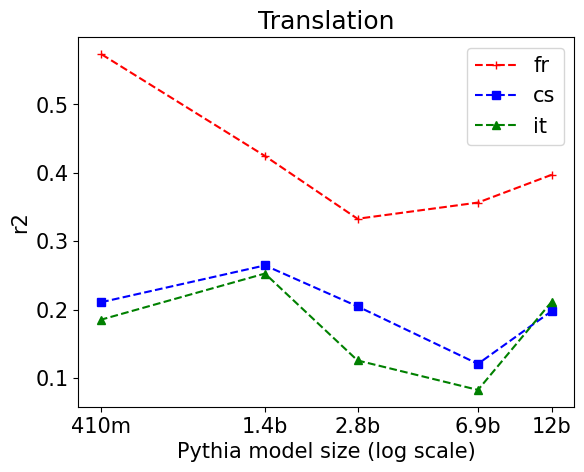

In [3]:
models = ['EleutherAI/pythia-12b', 'EleutherAI/pythia-6.9b', 
                'EleutherAI/pythia-2.8b', 'EleutherAI/pythia-1.4b', 
                'EleutherAI/pythia-410m']
model_sizes = ['12b', '6.9b', '2.8b', '1.4b', '410m']
np_line_styles = ['r+--', 'bs--', 'g^--', 'yo--', 'cp--', 'm*--']
# languages = ['cs', 'fr', 'es', 'de', 'hu', 'it']
languages = ['fr', 'cs', 'it']
xs = [np.log(12), np.log(6.9), np.log(2.8), np.log(1.4), np.log(0.41)]
ngrams = 2
x = list(range(len(models)))
y = []
for style, lan in zip(np_line_styles, languages):
    y = []
    for model in models:
        pth = f"figures/translation/dist/en-{lan}/{ngrams}/{model}/plots/Dataset_Content_(ds)_vs._Language_Model_(lm)_gens.json"
        r2 = json.load(open(pth))['r2']
        y.append(r2)
    plt.plot(xs, y, style, label=lan)
plt.xticks(xs, model_sizes)
plt.xlabel('Pythia model size (log scale)')
plt.ylabel('r2')
plt.title('Translation')
plt.legend()
plt.savefig('translation_r2.pdf')

plt.show()

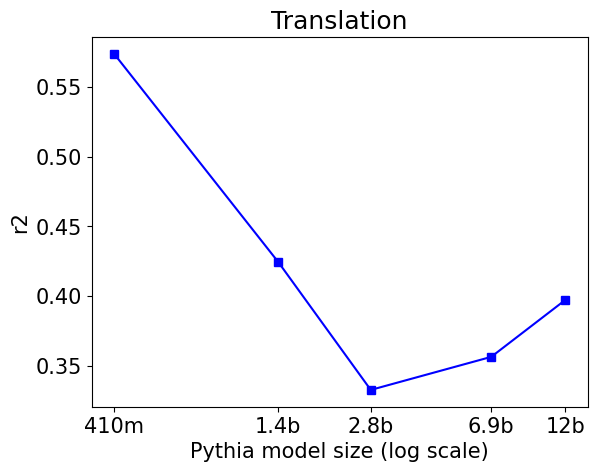

In [14]:
models = ['EleutherAI/pythia-12b', 'EleutherAI/pythia-6.9b', 
                'EleutherAI/pythia-2.8b', 'EleutherAI/pythia-1.4b', 
                'EleutherAI/pythia-410m']
model_sizes = ['12b', '6.9b', '2.8b', '1.4b', '410m']
xs = [np.log(12), np.log(6.9), np.log(2.8), np.log(1.4), np.log(0.41)]
task = 'en-fr'
ngrams = 2
x = list(range(len(models)))
y = []
for model in models:
    pth = f"figures/translation/dist/{task}/{ngrams}/{model}/plots/Dataset_Content_(ds)_vs._Language_Model_(lm)_gens.json"
    r2 = json.load(open(pth))['r2']
    y.append(r2)
plt.plot(xs, y, 'bs-')
plt.xticks(xs, model_sizes)
plt.xlabel('Pythia model size (log scale)')
plt.ylabel('r2')
plt.title(task)
plt.show()

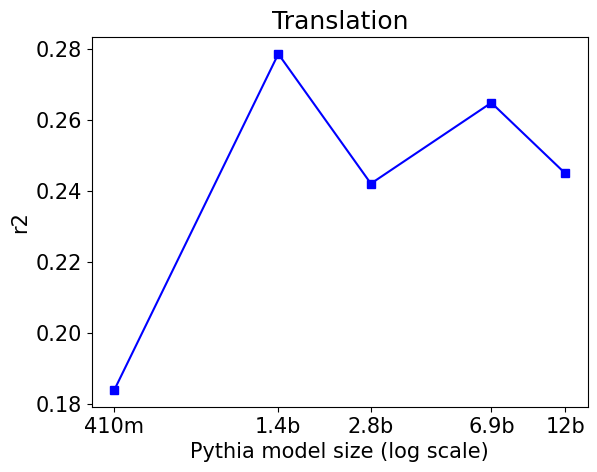

In [22]:
models = ['EleutherAI/pythia-12b', 'EleutherAI/pythia-6.9b', 
                'EleutherAI/pythia-2.8b', 'EleutherAI/pythia-1.4b', 
                'EleutherAI/pythia-410m']
model_sizes = ['12b', '6.9b', '2.8b', '1.4b', '410m']
xs = [np.log(12), np.log(6.9), np.log(2.8), np.log(1.4), np.log(0.41)]
task = 'en-es'
ngrams = 2
x = list(range(len(models)))
y = []
for model in models:
    pth = f"figures/translation/dist/{task}/{ngrams}/{model}/plots/Dataset_Content_(ds)_vs._Language_Model_(lm)_gens.json"
    r2 = json.load(open(pth))['r2']
    y.append(r2)
plt.plot(xs, y, 'bs-')
plt.xticks(xs, model_sizes)
plt.xlabel('Pythia model size (log scale)')
plt.ylabel('r2')
plt.title(task)
plt.show()

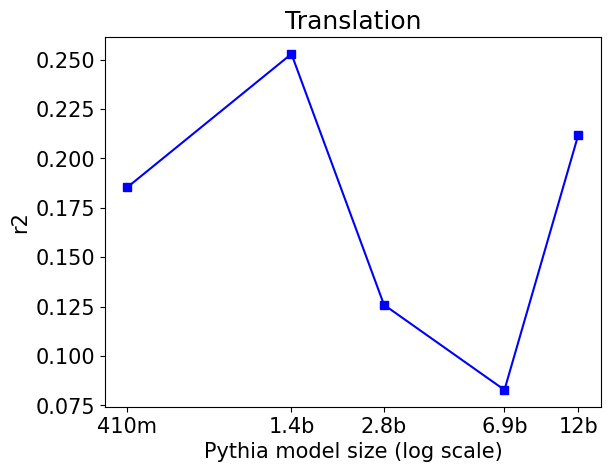

In [17]:
models = ['EleutherAI/pythia-12b', 'EleutherAI/pythia-6.9b', 
                'EleutherAI/pythia-2.8b', 'EleutherAI/pythia-1.4b', 
                'EleutherAI/pythia-410m']
model_sizes = ['12b', '6.9b', '2.8b', '1.4b', '410m']
xs = [np.log(12), np.log(6.9), np.log(2.8), np.log(1.4), np.log(0.41)]
task = 'en-it'
ngrams = 2
x = list(range(len(models)))
y = []
for model in models:
    pth = f"figures/translation/dist/{task}/{ngrams}/{model}/plots/Dataset_Content_(ds)_vs._Language_Model_(lm)_gens.json"
    r2 = json.load(open(pth))['r2']
    y.append(r2)
plt.plot(xs, y, 'bs-')
plt.xticks(xs, model_sizes)
plt.xlabel('Pythia model size (log scale)')
plt.ylabel('r2')
plt.title(task)
plt.show()

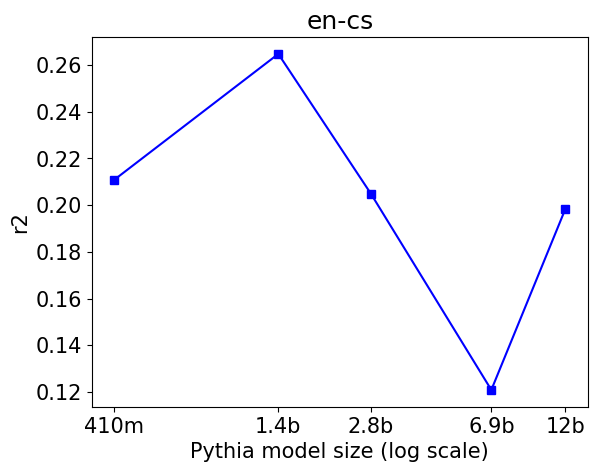

In [28]:
models = ['EleutherAI/pythia-12b', 'EleutherAI/pythia-6.9b', 
                'EleutherAI/pythia-2.8b', 'EleutherAI/pythia-1.4b', 
                'EleutherAI/pythia-410m']
model_sizes = ['12b', '6.9b', '2.8b', '1.4b', '410m']
xs = [np.log(12), np.log(6.9), np.log(2.8), np.log(1.4), np.log(0.41)]
task = 'en-cs'
ngrams = 2
x = list(range(len(models)))
y = []
for model in models:
    pth = f"figures/translation/dist/{task}/{ngrams}/{model}/plots/Dataset_Content_(ds)_vs._Language_Model_(lm)_gens.json"
    r2 = json.load(open(pth))['r2']
    y.append(r2)
plt.plot(xs, y, 'bs-')
plt.xticks(xs, model_sizes)
plt.xlabel('Pythia model size (log scale)')
plt.ylabel('r2')
plt.title(task)
plt.show()

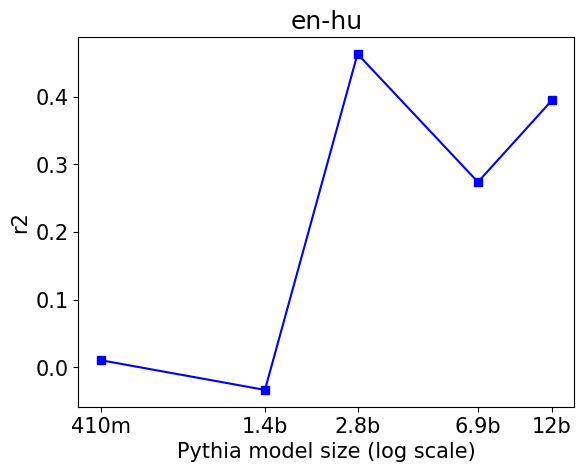

In [29]:
models = ['EleutherAI/pythia-12b', 'EleutherAI/pythia-6.9b', 
                'EleutherAI/pythia-2.8b', 'EleutherAI/pythia-1.4b', 
                'EleutherAI/pythia-410m']
model_sizes = ['12b', '6.9b', '2.8b', '1.4b', '410m']
xs = [np.log(12), np.log(6.9), np.log(2.8), np.log(1.4), np.log(0.41)]
task = 'en-hu'
ngrams = 2
x = list(range(len(models)))
y = []
for model in models:
    pth = f"figures/translation/dist/{task}/{ngrams}/{model}/plots/Dataset_Content_(ds)_vs._Language_Model_(lm)_gens.json"
    r2 = json.load(open(pth))['r2']
    y.append(r2)
plt.plot(xs, y, 'bs-')
plt.xticks(xs, model_sizes)
plt.xlabel('Pythia model size (log scale)')
plt.ylabel('r2')
plt.title(task)
plt.show()

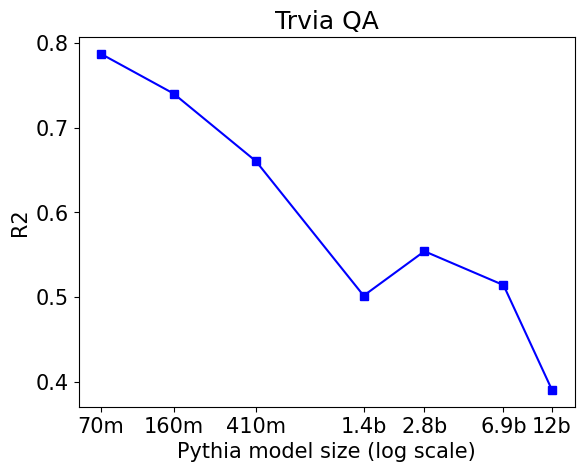

<Figure size 640x480 with 0 Axes>

In [4]:
models = ['EleutherAI/pythia-12b', 'EleutherAI/pythia-6.9b', 
                'EleutherAI/pythia-2.8b', 'EleutherAI/pythia-1.4b', 
                'EleutherAI/pythia-410m', 'EleutherAI/pythia-160m', 
                'EleutherAI/pythia-70m',]
model_sizes = ['12b', '6.9b', '2.8b', '1.4b', '410m', '160m', '70m']
xs = [np.log(12), np.log(6.9), np.log(2.8), np.log(1.4), np.log(0.41), np.log(0.16), np.log(0.07)]
task = 'trivia_qa'
ngrams = 5
x = list(range(len(models)))
y = []
for model in models:
    pth = f"figures/translation/dist/{task}/{ngrams}/{model}/plots/Dataset_Content_(ds)_vs._Language_Model_(lm)_gens.json"
    r2 = json.load(open(pth))['r2']
    y.append(r2)
plt.plot(xs, y, 'bs-')
plt.xticks(xs, model_sizes)
plt.xlabel('Pythia model size (log scale)')
plt.ylabel('R2')
plt.title('Trvia QA')
plt.savefig('trivia_qa_r2.pdf')
plt.show()

In [ ]:
import glob

def load_logits(logits_pth):
    logit_dict = {}
    all_pths = sorted(glob.glob(os.path.join(logits_pth, "**/*.pt"), recursive=True))
    for pth in tqdm(all_pths):
        logits = torch.load(pth)
        id_ = int(pth.split("_")[-1].split(".")[0])
        logit_dict[id_] = logits
        # print(f"id: {id_}, logits shape: {logits.shape}")
    return logit_dict

def load_tokens(tokens_path):
    token_dict = {}
    all_paths = sorted(glob.glob(os.path.join(tokens_path, "**/*.json"), recursive=True))
    
    for path in tqdm(all_paths):
        with open(path, 'r') as f:
            logits = json.load(f)
        
        id_ = int(path.split("_")[-1].split(".")[0])
        token_dict[id_] = logits
        # print(f"id: {id_}, number of logits: {len(logits)}")
    
    return token_dict


# model_results_pth =  "./models/pythia/debug"
model_results_pth = f"/share/edc/home/antonis/LLM-Incidental-Supervision/incidental-supervision/models/experiment_6_logits_max_5/inference/EleutherAI/pythia-12b/TRANSLATION/wmt09-{TASK}/0-shot"
model_logits_pth = os.path.join(model_results_pth, "logits")
model_tokens_pth = os.path.join(model_results_pth, "tokens")
model_logits = load_logits(model_logits_pth)
model_tokens = load_tokens(model_tokens_pth)

  1%|▏         | 40/3027 [00:00<00:29, 101.80it/s]

100%|██████████| 3027/3027 [00:18<00:00, 161.78it/s]


In [ ]:
model_logits

{0: tensor([[0.3684, 0.5967, 0.9648, 0.9697, 0.3457, 0.9917, 0.5400, 0.7432, 0.9985,
          0.8237, 0.6201, 0.9507, 0.9980, 0.4099, 0.9893, 0.9321, 0.9229]]),
 1: tensor([[0.2842, 0.9233, 0.9580, 0.9995, 0.5239, 0.3757, 0.7681, 0.9980, 0.9995,
          0.7734, 0.3872, 0.4531, 0.9995, 0.9844, 0.1855, 0.4678, 0.9946, 0.3137,
          0.7856, 0.9995, 0.9922, 0.6353, 0.8755, 0.9956, 1.0000, 0.9995, 0.8135,
          0.3813, 0.9883, 0.8730, 0.3962, 0.9985, 0.9067, 1.0000, 0.9375, 1.0000,
          0.9863, 0.3979, 0.8452, 0.9990, 0.4556, 0.9932, 0.9429, 0.9536, 0.9878,
          0.7432, 0.4775, 0.9365, 0.9976, 0.9126, 0.6016, 1.0000, 0.7529, 1.0000,
          0.8525, 0.9790, 0.9834, 0.9937, 0.9497, 0.9067]]),
 10: tensor([[0.2944, 0.9854, 0.6025, 0.6973, 0.8052, 0.9888, 0.6709, 0.4983, 0.9980,
          0.9980, 0.3508, 0.4375, 0.9922, 0.9517, 0.8008, 0.8027, 0.9976, 0.9912,
          0.6616, 0.9541, 0.9902, 1.0000, 0.9995, 0.9014, 0.9873, 0.9961, 0.9951,
          0.9365, 0.6455, 0.9282

In [ ]:
doc_results = json.load(open(os.path.join(model_results_pth, "doc_results.json"), 'r'))

In [ ]:
doc_results['wmt09-en-fr'][0]

{'src': 'In New York, Wall Street opened with significant losses.',
 'ref': 'À New-York, Wall Street ouvrait avec des pertes sensibles.',
 'result': [' Dans New York, Wall Street a ouvert avec des pertes significatives.'],
 'id': 0}

In [ ]:
d = pickle.load(open('data/translation/4/common/en-fr.pkl', "rb"))

In [ ]:
d

{('the Prague Stock Market', 'la bourse de Prague'): {'value': 0,
  'example': {'translation': {'en': 'After a sharp drop in the morning, the Prague Stock Market corrected its losses.',
    'fr': 'Après la chute de mardi matin, la bourse de Prague réctifia ses pertes.'}},
  'task': 'en-fr',
  'pair': ('the Prague Stock Market', 'la bourse de Prague'),
  'example_clean': 'After a sharp drop in the morning, the Prague Stock Market corrected its losses.'},
 ('reached nearly half of', 'atteignirent presque la moitié'): {'value': 0,
  'example': {'translation': {'en': 'Transactions with stocks from the Czech Energy Enterprise (ČEZ) reached nearly half of the regular daily trading.',
    'fr': 'Les transactions avec les actions ČEZ atteignirent presque la moitié des échanges quotidiens habituels.'}},
  'task': 'en-fr',
  'pair': ('reached nearly half of', 'atteignirent presque la moitié'),
  'example_clean': 'Transactions with stocks from the Czech Energy Enterprise (ČEZ) reached nearly half

In [ ]:
df = pd.DataFrame(d)

In [ ]:
df.T.reset_index(names=['lang_1', 'lang_2'])

,lang_1,lang_2,value,example,task,pair,example_clean
0,the Prague Stock Market,la bourse de Prague,0,{'translation': {'en': 'After a sharp drop in ...,en-fr,"(the Prague Stock Market, la bourse de Prague)","After a sharp drop in the morning, the Prague ..."
1,reached nearly half of,atteignirent presque la moitié,0,{'translation': {'en': 'Transactions with stoc...,en-fr,"(reached nearly half of, atteignirent presque ...",Transactions with stocks from the Czech Energy...
2,nearly half of the,presque la moitié des,135,{'translation': {'en': 'Transactions with stoc...,en-fr,"(nearly half of the, presque la moitié des)",Transactions with stocks from the Czech Energy...
3,The Prague Stock Market,la bourse de Prague,0,{'translation': {'en': 'The Prague Stock Marke...,en-fr,"(The Prague Stock Market, la bourse de Prague)",The Prague Stock Market immediately continued ...
4,stabilization of the financial,stabilisation du secteur financier,0,{'translation': {'en': 'The reaction of the ma...,en-fr,"(stabilization of the financial, stabilisation...",The reaction of the market to the results of t...
...,...,...,...,...,...,...,...
2749,the necessary authorisations to,des autorisations nécessaires pour,6,{'translation': {'en': 'Verdant has said that ...,en-fr,"(the necessary authorisations to, des autorisa...",Verdant has said that it has a long list of cl...
2750,so is more reliable,et donc plus fiable,0,{'translation': {'en': 'Even though it is an i...,en-fr,"(so is more reliable, et donc plus fiable)","Even though it is an intermittent phenomenon, ..."
2751,reliable as a source,plus fiable comme source,0,{'translation': {'en': 'Even though it is an i...,en-fr,"(reliable as a source, plus fiable comme source)","Even though it is an intermittent phenomenon, ..."
2752,the tide is more,la marée est plus,2,{'translation': {'en': 'Even though it is an i...,en-fr,"(the tide is more, la marée est plus)","Even though it is an intermittent phenomenon, ..."


In [ ]:
df = pickle.load(open('data/trivia_qa/3/examples_dfs_4-shot_common_models.pkl', "rb"))

In [ ]:
df['pythia-12b']

,Q,A,value,example,task,pair,example_clean,coverage,query,sum,...,id,gold,question,question_id,question_source,entity_pages,search_results,answer,lls,result
0,1 2 3,2,792534,{'question': 'What number has the square root ...,triviaqa,"(1 2 3, 2)",What number has the square root (to the neares...,0.15346,What number has the square root (to the neares...,1655290,...,12161_0,0,What number has the square root (to the neares...,bb_403,http://www.businessballs.com/,"{'doc_source': [], 'filename': [], 'title': []...","{'description': [], 'filename': [], 'rank': []...","{'aliases': ['2', 'two'], 'normalized_aliases'...",[[ 1]],1
1,places 14142 1,2,0,{'question': 'What number has the square root ...,triviaqa,"(places 14142 1, 2)",What number has the square root (to the neares...,0.15346,What number has the square root (to the neares...,1655290,...,12161_0,0,What number has the square root (to the neares...,bb_403,http://www.businessballs.com/,"{'doc_source': [], 'filename': [], 'title': []...","{'description': [], 'filename': [], 'rank': []...","{'aliases': ['2', 'two'], 'normalized_aliases'...",[[ 1]],1
2,nearest four decimal,2,28,{'question': 'What number has the square root ...,triviaqa,"(nearest four decimal, 2)",What number has the square root (to the neares...,0.15346,What number has the square root (to the neares...,1655290,...,12161_0,0,What number has the square root (to the neares...,bb_403,http://www.businessballs.com/,"{'doc_source': [], 'filename': [], 'title': []...","{'description': [], 'filename': [], 'rank': []...","{'aliases': ['2', 'two'], 'normalized_aliases'...",[[ 1]],1
3,14142 1 2,2,0,{'question': 'What number has the square root ...,triviaqa,"(14142 1 2, 2)",What number has the square root (to the neares...,0.15346,What number has the square root (to the neares...,1655290,...,12161_0,0,What number has the square root (to the neares...,bb_403,http://www.businessballs.com/,"{'doc_source': [], 'filename': [], 'title': []...","{'description': [], 'filename': [], 'rank': []...","{'aliases': ['2', 'two'], 'normalized_aliases'...",[[ 1]],1
4,decimal places 14142,2,0,{'question': 'What number has the square root ...,triviaqa,"(decimal places 14142, 2)",What number has the square root (to the neares...,0.15346,What number has the square root (to the neares...,1655290,...,12161_0,0,What number has the square root (to the neares...,bb_403,http://www.businessballs.com/,"{'doc_source': [], 'filename': [], 'title': []...","{'description': [], 'filename': [], 'rank': []...","{'aliases': ['2', 'two'], 'normalized_aliases'...",[[ 1]],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57430,1800 battle saw,marengo,0,{'question': 'Which 1800 battle saw Napoleon's...,triviaqa,"(1800 battle saw, marengo)",Which 1800 battle saw Napoleon's forces victor...,0.15346,Which 1800 battle saw Napoleon's forces victor...,0,...,3579_0,0,Which 1800 battle saw Napoleon's forces victor...,odql_7876,http://www.odquiz.org.uk/,"{'doc_source': [], 'filename': [], 'title': []...","{'description': [], 'filename': [], 'rank': []...","{'aliases': ['Marengo (disambiguation)', 'Mare...",[[ Battle of Marengo]],Battle of Marengo
57431,austrians near alessandria,marengo,0,{'question': 'Which 1800 battle saw Napoleon's...,triviaqa,"(austrians near alessandria, marengo)",Which 1800 battle saw Napoleon's forces victor...,0.15346,Which 1800 battle saw Napoleon's forces victor...,0,...,3579_0,0,Which 1800 battle saw Napoleon's forces victor...,odql_7876,http://www.odquiz.org.uk/,"{'doc_source': [], 'filename': [], 'title': []...","{'description': [], 'filename': [], 'rank': []...","{'aliases': ['Marengo (disambiguation)', 'Mare...",[[ Battle of Marengo]],Battle of Marengo
57432,saw napoleons forces,marengo,0,{'question': 'Which 1800 battle saw Napoleon's...,triviaqa,"(saw napoleons forces, marengo)",Which 1800 battle saw Napoleon's forces victor...,0.15346,Which 1800 battle saw Napoleon's forces victor...,0,...,3579_0,0,Which 

In [ ]:
model_results_pth = f'/share/edc/home/antonis/LLM-Incidental-Supervision/incidental-supervision/models/experiment_5/inference/EleutherAI/pythia-12b/TRIVIA_QA/triviaqa/0-shot'
doc_results = json.load(open(os.path.join(model_results_pth, "doc_results.json"), 'r'))

In [ ]:
doc_results['triviaqa'][0]

{'question': 'In April 1963, Lester Bowles Pearson became Prime Minister of which country?',
 'question_id': 'qb_4397',
 'question_source': 'http://www.quizballs.com/',
 'entity_pages': {'doc_source': [],
  'filename': [],
  'title': [],
  'wiki_context': []},
 'search_results': {'description': [],
  'filename': [],
  'rank': [],
  'title': [],
  'url': [],
  'search_context': []},
 'answer': {'aliases': ['Canada',
   'Canadá',
   'The Dominion of Canada',
   'Commonwealth of Canada',
   'Dominion of canada',
   'ISO 3166-1:CA',
   'Etymology of Canada',
   'CANADA',
   'Canadiophile',
   "Canada's",
   'ᑲᓇᑕ',
   'Canada/References',
   "America's top hat",
   'Canada.',
   'Cnada',
   'Čanada',
   'Canadian Federation',
   'Kenadian',
   'Canadialand',
   'Xanada',
   'Dominion of Canada',
   'Canadaa'],
  'normalized_aliases': ['canada s',
   'canadá',
   'ᑲᓇᑕ',
   'čanada',
   'canadaa',
   'america s top hat',
   'cnada',
   'kenadian',
   'xanada',
   'canadian federation',
   'is

In [ ]:
# examples_pth = "./results/n-grams/exp_full/2/examples_dfs_0-shot_common_models.pkl"
# Common
# examples_pth = "./results/n-grams/wmt/pile/exp4/n_samples_None_fkeyFalse_rkeyFalse_fstopTrue_onlyalphaTrue/2/common/lang_dfs_filter_charsFalse_percentile0.999_n_gram2.pkl"
# All
# examples_pth = "./results/n-grams/wmt/pile/exp4/n_samples_None_fkeyFalse_rkeyFalse_fstopTrue_onlyalphaTrue/1/all/lang_dfs_filter_charsFalse_percentile0.95.pkl"
# europarl
# All
examples_pth_all = "/share/edc/home/antonis/LLM-Incidental-Supervision/incidental-supervision/results/n-grams/europarl/pile/exp4/n_samples_20000_fkeyFalse_rkeyFalse_fstopFalse_onlyalphaTrue/2/all/lang_dfs_is_allTrue_filter_charsFalse_percentile0_detect_langFalse_filter_entitiesTrue.pkl"
# examples_pth_all = "./results/n-grams/europarl/pile/exp4/n_samples_20000_fkeyFalse_rkeyFalse_fstopFalse_onlyalphaTrue/2/all/lang_dfs_is_allTrue_filter_charsFalse_percentile0_detect_langFalse_filter_entitiesTrue_filter_stopwordsTrue.pkl"
# examples_pth_all = "./results/n-grams/europarl/pile/exp4/n_samples_20000_fkeyFalse_rkeyFalse_fstopFalse_onlyalphaTrue/2/all/lang_dfs_is_allTrue_filter_charsFalse_percentile0_detect_langFalse_filter_entitiesTrue_filter_stopwordsFalse_remove_englishFalse_remove_non_englishTrue.pkl"
examples_all = pickle.load(open(examples_pth_all, "rb"))['en-fr']
examples_all = filter_percentile(examples_all, 0.95)
# common
# examples_pth_common = "./results/n-grams/europarl/pile/exp4/n_samples_20000_fkeyFalse_rkeyFalse_fstopFalse_onlyalphaTrue/2/common/lang_dfs_filter_charsFalse_percentile0_detect_langFalse_filter_entitiesTrue_align_langs0.pkl"
# examples_pth_common = "./results/n-grams/europarl/pile/exp4/n_samples_20000_fkeyFalse_rkeyFalse_fstopFalse_onlyalphaTrue/2/all/lang_dfs_is_allTrue_filter_charsFalse_percentile0_detect_langFalse_filter_entitiesTrue_filter_stopwordsTrue.pkl"
examples_pth_common = "/share/edc/home/antonis/LLM-Incidental-Supervision/incidental-supervision/results/n-grams/europarl/pile/exp4/n_samples_20000_fkeyFalse_rkeyFalse_fstopFalse_onlyalphaTrue/2/common/lang_dfs_filter_charsFalse_percentile0_detect_langFalse_filter_entitiesTrue_filter_stopwordsTrue_align_langs0.pkl"
examples_common = pickle.load(open(examples_pth_common, "rb"))['en-fr']
examples_common = filter_percentile(examples_common, 0.975)

# df = pickle.load(open(examples_pth, "rb"))

# # df_12b = df['pythia-12b']
# # df_fr_en = df_12b[df_12b['task'] == 'fr-en']
# df = df['en-fr']
# df = filter_percentile(df, percentile)
# df.head(2)

In [ ]:
examples_common

,lang_1,lang_2,value,example,task,pair,example_clean,coverage
0,I mean,veux dire,3476,{'translation': {'en': 'When I say that it is ...,en-fr,"(I mean, veux dire)",When I say that it is a good thing for a young...,0.765278
1,and must,Il faut,3470,{'translation': {'en': 'Muslims are and must b...,en-fr,"(and must, Il faut)",Muslims are and must be able to practise their...,0.765278
2,The new,Une nouvelle,3470,{'translation': {'en': 'The new Commission mus...,en-fr,"(The new, Une nouvelle)","The new Commission must be appointed quickly, ...",0.765278
3,It is,devrait être,3462,{'translation': {'en': 'It is still a little e...,en-fr,"(It is, devrait être)",It is still a little early to say what action ...,0.765278
4,aim of,Le but,3460,{'translation': {'en': 'The aim of the EGF is ...,en-fr,"(aim of, Le but)",The aim of the EGF is to help workers who are ...,0.765278
...,...,...,...,...,...,...,...,...
38827,It exploits,Elle exploite,1,{'translation': {'en': 'It exploits the cases ...,en-fr,"(It exploits, Elle exploite)",It exploits the cases of piracy in an area in ...,0.765278
38826,promote its,veut promouvoir,1,{'translation': {'en': 'It exploits the cases ...,en-fr,"(promote its, veut promouvoir)",It exploits the cases of piracy in an area in ...,0.765278
38825,peace in,paix puisse,1,{'translation': {'en': 'Europe must become a p...,en-fr,"(peace in, paix puisse)",Europe must become a political body and negoti...,0.765278
38824,pandemic of,éventuelle pandémie,1,{'translation': {'en': 'In the light of the re...,en-fr,"(pandemic of, éventuelle pandémie)",In the light of the reaction of several Europe...,0.765278


In [ ]:
examples_all.head()

,fr,value,example,task,example_clean,sequence,coverage
0,ici en,69020,{'translation': {'en': 'As Mrs Gill has alread...,en-fr,"As Mrs Gill has already said, it is very impor...",ici en,0.999327
1,quelque sorte,69020,{'translation': {'en': 'They would act as mess...,en-fr,"They would act as messengers, as it were: they...",quelque sorte,0.999327
2,La meilleure,68992,{'translation': {'en': 'There is no better way...,en-fr,There is no better way to honour the memory of...,La meilleure,0.999327
3,fait est,68952,{'translation': {'en': 'But right now I simply...,en-fr,But right now I simply cannot ignore the fact ...,fait est,0.999327
4,international conventions,68936,"{'translation': {'en': 'To put it plainly, we ...",en-fr,"To put it plainly, we need to challenge the hi...",international conventions,0.999327


In [ ]:
examples_common.head()

,lang_1,lang_2,value,example,task,pair,example_clean,coverage
0,I mean,veux dire,3476,{'translation': {'en': 'When I say that it is ...,en-fr,"(I mean, veux dire)",When I say that it is a good thing for a young...,0.765278
1,and must,Il faut,3470,{'translation': {'en': 'Muslims are and must b...,en-fr,"(and must, Il faut)",Muslims are and must be able to practise their...,0.765278
2,The new,Une nouvelle,3470,{'translation': {'en': 'The new Commission mus...,en-fr,"(The new, Une nouvelle)","The new Commission must be appointed quickly, ...",0.765278
3,It is,devrait être,3462,{'translation': {'en': 'It is still a little e...,en-fr,"(It is, devrait être)",It is still a little early to say what action ...,0.765278
4,aim of,Le but,3460,{'translation': {'en': 'The aim of the EGF is ...,en-fr,"(aim of, Le but)",The aim of the EGF is to help workers who are ...,0.765278


In [ ]:
def subtract_values(df1, df2, col1, col2, value_col):
    # Merge the two DataFrames based on the specified columns
    merged_df = pd.merge(df1, df2, left_on=col1, right_on=col2, suffixes=('_1', '_2'), how='left')
    
    # Subtract the values from df2 from df1 where the specified columns match
    merged_df[value_col + '_diff'] = merged_df[value_col + '_1'] - merged_df[value_col + '_2']
    
    # Calculate the average difference for the values that have matches
    avg_diff = merged_df[value_col + '_diff'].mean()
    
    # Fill the missing values in the '_diff' column with the average difference
    merged_df[value_col + '_diff'].fillna(avg_diff, inplace=True)
    
    # For the values that have no matches, subtract the average difference from the original value
    merged_df.loc[merged_df[value_col + '_2'].isna(), value_col + '_diff'] = merged_df[value_col + '_1'] - avg_diff
    
    return merged_df

examples_diff = subtract_values(examples_all, examples_common, LANG_COL_ALL, LANG_COL_COMMON, 'value')
df = examples_common

In [ ]:
# test_logits(model_logits, doc_results, tokenizer, model_tokens)

In [ ]:
# calculate ngram distribution
def calc_ngram_dist(df, lang_col, value_col):
    ngram_counts = df.groupby(lang_col)[value_col].sum()
    n_gram_dist = (ngram_counts / ngram_counts.sum()).astype(float)
    n_gram_dist = n_gram_dist[n_gram_dist > 0]
    n_gram_dist = np.log(n_gram_dist)
    return n_gram_dist

n_gram_dist_all = calc_ngram_dist(examples_all, LANG_COL_ALL, VALUE_COL)
n_gram_dist_common = calc_ngram_dist(examples_common, LANG_COL_COMMON, VALUE_COL)

In [ ]:
n_gram_dist_common

lang_2
A cet            -7.726460
A plutôt        -11.195351
A présent       -11.301961
A quoi          -10.863706
A semble        -11.140693
                   ...    
îles Canaries   -12.020426
îles grecques   -12.739549
œuvre après     -14.585375
œuvre toutes    -12.911399
Špidla a        -15.683988
Name: value, Length: 15763, dtype: float64

In [ ]:
n_gram_dist_all_ = n_gram_dist_all.reset_index(name='log_prob')
n_gram_dist_common_ = n_gram_dist_common.reset_index(name='log_prob')

In [ ]:
n_gram_dist_common_

,lang_2,log_prob
0,A cet,-7.726460
1,A plutôt,-11.195351
2,A présent,-11.301961
3,A quoi,-10.863706
4,A semble,-11.140693
...,...,...
15758,îles Canaries,-12.020426
15759,îles grecques,-12.739549
15760,œuvre après,-14.585375
15761,œuvre toutes,-12.911399


In [ ]:
# subtract ngram log dist all from common
n_gram_dist_all_ = n_gram_dist_all.reset_index(name='log_prob')
n_gram_dist_common_ = n_gram_dist_common.reset_index(name='log_prob')
log_prob_col = 'log_prob'
n_gram_dist_diff = subtract_values(n_gram_dist_common_, n_gram_dist_all_, LANG_COL_COMMON, LANG_COL_ALL, log_prob_col)
n_gram_dist_diff.dropna(subset=[log_prob_col + '_diff'], inplace=True)
n_gram_dist_diff.reset_index(inplace=True)

VALUE_COL_DIST= log_prob_col + '_diff'


n_gram_log_dist = n_gram_log_dist.reset_index().rename(columns={'index': 'lang_2'})

In [ ]:
examples_common.head(2)

,lang_1,lang_2,value,example,task,pair,example_clean,coverage
0,I mean,veux dire,3476,{'translation': {'en': 'When I say that it is ...,en-fr,"(I mean, veux dire)",When I say that it is a good thing for a young...,0.765278
1,and must,Il faut,3470,{'translation': {'en': 'Muslims are and must b...,en-fr,"(and must, Il faut)",Muslims are and must be able to practise their...,0.765278


In [ ]:
# examples_common[examples_common['value'] > 0]

In [ ]:
def calc_ngram_dist_factorized(df_1, df_2, lang_col_1, lang_col_2):
    df_1['dist'] = df_1['value'] / df_1['value'].sum()
    df_1 = df_1[df_1['dist'] > 0]

    df_2['dist'] = df_2['value'] / df_2['value'].sum()
    df_2 = df_2[df_2['dist'] > 0]

    # Replace zero values with a small positive value (e.g., 1e-8)
    df_1['dist'].replace(0, 1e-8, inplace=True)
    df_2['dist'].replace(0, 1e-8, inplace=True)

    # Ensure no NaN or inf values before taking log
    df_1['dist'].replace([np.inf, -np.inf], np.nan, inplace=True)
    df_2['dist'].replace([np.inf, -np.inf], np.nan, inplace=True)
    df_1.dropna(subset=['dist'], inplace=True)
    df_2.dropna(subset=['dist'], inplace=True)

    df_1['log_dist'] = np.log(df_1['dist'])
    df_2['log_dist'] = np.log(df_2['dist'])

    df_1 = subtract_values(df_1, df_2, lang_col_1, lang_col_2, 'log_dist')

    return df_1

df_common_factorized = calc_ngram_dist_factorized(examples_common, examples_all, LANG_COL_COMMON, LANG_COL_ALL)
VALUE_COL_DIST = 'log_dist_1'
df_common_factorized.head(1)

,lang_1,lang_2,value_1,example_1,task_1,pair,example_clean_1,coverage_1,dist_1,log_dist_1,fr,value_2,example_2,task_2,example_clean_2,sequence,coverage_2,dist_2,log_dist_2,log_dist_diff
0,I mean,veux dire,3476,{'translation': {'en': 'When I say that it is ...,en-fr,"(I mean, veux dire)",When I say that it is a good thing for a young...,0.765278,0.000537,-7.53035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.149968


In [ ]:
n_gram_dist_common_.head(1)

,lang_2,log_prob
0,A cet,-7.72646


In [ ]:
examples_common.head(1)

,lang_1,lang_2,value,example,task,pair,example_clean,coverage,dist
0,I mean,veux dire,3476,{'translation': {'en': 'When I say that it is ...,en-fr,"(I mean, veux dire)",When I say that it is a good thing for a young...,0.765278,0.000537


In [ ]:
examples_common.groupby('lang_2')['value'].sum()

lang_2
A cet            2857
A plutôt           89
A présent          80
A quoi            124
A semble           94
                 ... 
îles Canaries      39
îles grecques      19
œuvre après         3
œuvre toutes       16
Špidla a            1
Name: value, Length: 15763, dtype: object

In [ ]:
# doc_results, model_logits, model_tokens

result_1 = doc_results[0]
logit_1 = model_logits[result_1['id']]
tokens_1 = model_tokens[result_1['id']][0]

print(result_1)
print(logit_1.shape)
print(len(tokens_1))

"""
1. break down the generation into all possible ngrams
2. search for each possible ngram in the n_gram_log_dist
3. pick the ones with the highest probability. make sure
   no ngrams overlap in the chosen set
4. match the chosen ngrams, to the tokens and their associated
   logits
"""

{'src': 'In New York, Wall Street opened with significant losses.', 'ref': 'À New-York, Wall Street ouvrait avec des pertes sensibles.', 'result': [' Dans New York, Wall Street a ouvert avec des pertes significatives.'], 'id': 0}
torch.Size([1, 17])
17


'\n1. break down the generation into all possible ngrams\n2. search for each possible ngram in the n_gram_log_dist\n3. pick the ones with the highest probability. make sure\n   no ngrams overlap in the chosen set\n4. match the chosen ngrams, to the tokens and their associated\n   logits\n'

In [ ]:
n_gram_log_dist.head(2)

,lang_2,lang_2,value
0,0,A cet,-7.726460
1,1,A plutôt,-11.195351


In [ ]:
n_gram_dist_common_

,lang_2,log_prob
0,A cet,-7.726460
1,A plutôt,-11.195351
2,A présent,-11.301961
3,A quoi,-10.863706
4,A semble,-11.140693
...,...,...
15758,îles Canaries,-12.020426
15759,îles grecques,-12.739549
15760,œuvre après,-14.585375
15761,œuvre toutes,-12.911399


In [ ]:
examples_pth_all

'./results/n-grams/europarl/pile/exp4/n_samples_20000_fkeyFalse_rkeyFalse_fstopFalse_onlyalphaTrue/2/all/lang_dfs_is_allTrue_filter_charsFalse_percentile0_detect_langFalse_filter_entitiesTrue.pkl'

In [ ]:
doc_results[0]

{'src': 'In New York, Wall Street opened with significant losses.',
 'ref': 'À New-York, Wall Street ouvrait avec des pertes sensibles.',
 'result': [' Dans New York, Wall Street a ouvert avec des pertes significatives.'],
 'id': 0}

In [ ]:
def generate_ngrams(text, n):
    words = text.split()
    ngrams = []
    for i in range(len(words) - n + 1):
        ngram = ' '.join(words[i:i+n])
        ngrams.append(ngram)
    return ngrams

def find_ngrams_in_dist(ngrams, n_gram_log_dist, col_name, lang_col):
    ngram_probs = []
    lang_col = lang_col if lang_col in n_gram_log_dist.columns else 'lang_2'
    for ngram in ngrams:
        # print(ngram)
        if ngram in list(n_gram_log_dist[lang_col]):
            # print("found")
            prob = n_gram_log_dist[n_gram_log_dist[lang_col] == ngram][col_name].values[0]
            ngram_probs.append((ngram, prob))
    return ngram_probs

def pick_nonoverlapping_ngrams(ngram_probs):
    ngram_probs.sort(key=lambda x: x[1], reverse=True)
    chosen_ngrams = []
    for ngram, prob in ngram_probs:
        if not any(ngram in chosen_ngram for chosen_ngram in chosen_ngrams):
            chosen_ngrams.append(ngram)
    return chosen_ngrams

def match_ngrams_to_probs(chosen_ngrams, tokens, probs, tokenizer):
    ngram_probs = []
    for ngram in chosen_ngrams:
        ngram_tokens = tokenizer.encode(ngram)
        # token_indices = [tokens.index(token) for token in ngram_tokens]
        token_indices = []
        # print(tokens)
        for token in ngram_tokens:
            if token in tokens:
                # print(f"token found!")
                token_indices.append(tokens.index(token))
            else:
                # print(f"Token {token} not found in tokens")
                continue
        # assert len(token_indices) == len(ngram_tokens), f"Token indices: {token_indices}, ngram tokens: {ngram_tokens}"
        # assert token_indices <= len(tokens), f"Token indices: {token_indices}, tokens: {tokens}"
        ngram_logit = probs[token_indices].mean()
        ngram_probs.append((ngram, ngram_logit.item()))
    # if len(ngram_probs) == 0:
        # print(f"No ngrams found in tokens")
    return ngram_probs

def process_doc_results(doc_results, model_tokens, model_probs, 
                        tokenizer, n_gram_log_dist, value_col, n_iters=None,
                        save_pth=None):
    if n_iters is None:
        n_iters = len(doc_results)
    
    for i in tqdm(range(n_iters)):
        result = doc_results[i]
        generation = result['result'][0]
        tokens = model_tokens[result['id']][0]
        probs = model_probs[result['id']][0]
        
        ngrams = generate_ngrams(generation, n=2)
        ngram_ds_probs = find_ngrams_in_dist(ngrams, n_gram_log_dist, 
                                             value_col, LANG_COL)
        chosen_ngrams = pick_nonoverlapping_ngrams(ngram_ds_probs)
        ngram_lm_probs = match_ngrams_to_probs(chosen_ngrams, tokens, probs, tokenizer)
        
        # save results
        doc_results[i]['ngram_ds_probs'] = ngram_ds_probs
        doc_results[i]['ngram_lm_probs'] = ngram_lm_probs
        doc_results[i]['chosen_ngrams'] = chosen_ngrams
    
    if save_pth is not None:
        with open(save_pth, 'w') as f:
            json.dump(doc_results, f)
    
    return doc_results

def create_ngram_dataframe(doc_results_new):
    data = []

    for row in doc_results_new:
        chosen_ngrams = row['chosen_ngrams']
        ngram_ds_probs = row['ngram_ds_probs']
        ngram_lm_probs = row['ngram_lm_probs'] if 'ngram_lm_probs' in row else row['ngram_lm_logits']
        
        for ngram, ds_prob, lm_logit in zip(chosen_ngrams, ngram_ds_probs, ngram_lm_probs):
            data.append({
                'ngrams': ngram,
                'ds_probs': ds_prob[1],
                'lm_probs': lm_logit[1]
            })

    df = pd.DataFrame(data)

    # if there's more than one
    # entry for an ngram, take the mean
    df = df.groupby('ngrams').mean().reset_index()
    
    df['lm_probs'] = np.log(df['lm_probs'])
    return df

from scipy.spatial.distance import jensenshannon
from scipy.stats import pearsonr

def calculate_similarity(lm_probs, ds_probs, method='kl_divergence'):
    """
    Calculate the similarity between two probability distributions.
    'lm_probs' and 'ds_probs' should be lists of probabilities for each ngram.
    """
    # Normalize the probabilities
    lm_probs = np.array(lm_probs)
    ds_probs = np.array(ds_probs)
    lm_probs_normalized = lm_probs / lm_probs.sum()
    ds_probs_normalized = ds_probs / ds_probs.sum()
    
    # Choose the method to calculate similarity
    if method == 'kl_divergence':
        # Calculate the Jensen-Shannon divergence, which is the symmetrized and smoothed version of KL divergence
        similarity = jensenshannon(lm_probs_normalized, ds_probs_normalized)
    elif method == 'correlation':
        # Calculate the Pearson correlation coefficient
        correlation, _ = pearsonr(lm_probs_normalized, ds_probs_normalized)
        similarity = correlation
    elif method == 'mse':
        similarity = mean_squared_error(lm_probs_normalized, ds_probs_normalized)
    elif method == 'cross_entropy':
        similarity = -np.sum(ds_probs_normalized * np.log(lm_probs_normalized))
    elif method == 'xinyi':
        similarity = -np.sum(np.log(lm_probs_normalized))
    else:
        raise ValueError("Unsupported method for similarity calculation.")
    
    return similarity

def create_prob_seq_df(doc_results_new):
    data = []
    
    for row in doc_results_new:
        chosen_ngrams = row['chosen_ngrams']
        ngram_ds_probs = dict(row['ngram_ds_probs'])
        ngram_lm_probs = dict(row['ngram_lm_probs'] if 'ngram_lm_probs' in row else row['ngram_lm_logits'])
        len_ngrams = len(ngram_ds_probs)
        len_probs = len(ngram_lm_probs) 

        ds_probs = [ngram_ds_probs[ngram] for ngram in chosen_ngrams]
        lm_probs = [ngram_lm_probs[ngram] for ngram in chosen_ngrams]

        lm_probs_kldiv = calculate_similarity(np.log(lm_probs), ds_probs, method='kl_divergence')
        # lm_probs_corr = calculate_similarity(lm_probs, ds_probs, method='correlation')
        if len_ngrams and len_probs > 0:
            lm_probs_mse = calculate_similarity(lm_probs, np.exp(ds_probs), method='mse')
            lm_probs_cross_entropy = calculate_similarity(lm_probs, np.exp(ds_probs), method='cross_entropy')
            lm_probs_xinyi = calculate_similarity(lm_probs, np.exp(ds_probs), method='xinyi')
        
        data.append({
            'example': row['result'][0],
            'id': row['id'],
            'ngrams': chosen_ngrams,
            'ds_probs': ds_probs,
            'ds_probs_sum': np.sum(ds_probs),
            'ds_probs_mean': np.mean(ds_probs) if ds_probs else None,
            'lm_probs': lm_probs,
            'lm_probs_log': np.log(lm_probs) if lm_probs else None,
            'lm_probs_sum': np.sum(np.log(lm_probs)) if lm_probs else None,
            'lm_probs_mean': np.mean(np.log(lm_probs)) if lm_probs else None,
            'len_ngrams': len_ngrams,
            'len_probs': len_probs,
            'lm_probs_kldiv': lm_probs_kldiv,
            'lm_probs_mse': lm_probs_mse,
            'lm_probs_cross_entropy': lm_probs_cross_entropy,
            'lm_probs_xinyi': lm_probs_xinyi
        })
    
    return pd.DataFrame(data).dropna()

In [ ]:
examples_common

,lang_1,lang_2,value,example,task,pair,example_clean,coverage,dist
0,I mean,veux dire,3476,{'translation': {'en': 'When I say that it is ...,en-fr,"(I mean, veux dire)",When I say that it is a good thing for a young...,0.765278,0.000537
1,and must,Il faut,3470,{'translation': {'en': 'Muslims are and must b...,en-fr,"(and must, Il faut)",Muslims are and must be able to practise their...,0.765278,0.000536
2,The new,Une nouvelle,3470,{'translation': {'en': 'The new Commission mus...,en-fr,"(The new, Une nouvelle)","The new Commission must be appointed quickly, ...",0.765278,0.000536
3,It is,devrait être,3462,{'translation': {'en': 'It is still a little e...,en-fr,"(It is, devrait être)",It is still a little early to say what action ...,0.765278,0.000534
4,aim of,Le but,3460,{'translation': {'en': 'The aim of the EGF is ...,en-fr,"(aim of, Le but)",The aim of the EGF is to help workers who are ...,0.765278,0.000534
...,...,...,...,...,...,...,...,...,...
38827,It exploits,Elle exploite,1,{'translation': {'en': 'It exploits the cases ...,en-fr,"(It exploits, Elle exploite)",It exploits the cases of piracy in an area in ...,0.765278,0.0
38826,promote its,veut promouvoir,1,{'translation': {'en': 'It exploits the cases ...,en-fr,"(promote its, veut promouvoir)",It exploits the cases of piracy in an area in ...,0.765278,0.0
38825,peace in,paix puisse,1,{'translation': {'en': 'Europe must become a p...,en-fr,"(peace in, paix puisse)",Europe must become a political body and negoti...,0.765278,0.0
38824,pandemic of,éventuelle pandémie,1,{'translation': {'en': 'In the light of the re...,en-fr,"(pandemic of, éventuelle pandémie)",In the light of the reaction of several Europe...,0.765278,0.0


In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model)
model_probs = model_logits
doc_pth = os.path.dirname(examples_pth_common) + f"/doc_results_ngrams_{NAME}.json"
if os.path.exists(doc_pth):
    doc_results_new = json.load(open(doc_pth, 'r'))
else:
    doc_results_new = process_doc_results(doc_results, model_tokens, model_probs, 
                                          tokenizer, n_gram_dist_common_, 'log_prob',
                                          n_iters=None, save_pth=doc_pth)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
n_gram_dist_all_

,fr,log_prob
0,A cet,-10.662657
1,A cette,-10.767152
2,A juste,-11.513322
3,A mon,-10.576902
4,A ou,-11.080024
...,...,...
98079,œuvrons tous,-16.937957
98080,œuvré ensemble,-17.092108
98081,œuvré pour,-12.774620
98082,Šefčovič de,-16.281178


In [ ]:
n_gram_dist_common_

,lang_2,log_prob
0,A cet,-7.726460
1,A plutôt,-11.195351
2,A présent,-11.301961
3,A quoi,-10.863706
4,A semble,-11.140693
...,...,...
15758,îles Canaries,-12.020426
15759,îles grecques,-12.739549
15760,œuvre après,-14.585375
15761,œuvre toutes,-12.911399


In [ ]:
# else:
#     doc_results_new = json.load(open(doc_pth, 'r'))
df = create_ngram_dataframe(doc_results_new)
df_examples = create_prob_seq_df(doc_results_new)

In [ ]:
df_examples

,example,id,ngrams,ds_probs,ds_probs_sum,ds_probs_mean,lm_probs,lm_probs_log,lm_probs_sum,lm_probs_mean,len_ngrams,len_probs,lm_probs_kldiv,lm_probs_mse,lm_probs_cross_entropy,lm_probs_xinyi
0,"Dans New York, Wall Street a ouvert avec des ...",0,"[avec des, a ouvert, des pertes]","[-7.334859398599686, -13.342392499341267, -13....",-34.197020,-11.399007,"[0.6201171875, 0.870849609375, 0.974365234375]","[-0.47784680670676144, -0.1382859813604522, -0...",-0.642102,-0.214034,3,3,0.417067,0.000912,1.069040,3.349081
1,"Dans trois groupes, cette maladie est expérim...",1,"[à la, parmi les, de manière, les personnes, e...","[-5.6990561219851115, -7.934035498659843, -8.2...",-167.334338,-11.952453,"[0.87548828125, 0.9306640625, 0.731201171875, ...","[-0.13297351255426554, -0.07185690194525098, -...",-2.663055,-0.190218,14,14,0.294331,0.000410,2.641826,37.061847
2,"Si vous êtes un écouteur plus exigeant, prene...",2,"[vous êtes, Si vous, êtes un, téléphones porta...","[-6.77179895082495, -7.789059268215552, -11.78...",-41.459563,-10.364891,"[0.96337890625, 0.93603515625, 0.919189453125,...","[-0.037308480136783055, -0.0661022431137539, -...",-0.294011,-0.073503,4,4,0.044500,0.007417,1.394339,5.546459
3,Les marchés financiers ont baissé de 7 % à 99...,3,"[sur le, marchés financiers]","[-5.033611677476293, -10.42977237768064]",-15.463384,-7.731692,"[0.4287109375, 0.7102864384651184]","[-0.8469723925242817, -0.34208695584666265]",-1.189059,-0.594530,2,2,0.277335,0.002588,0.636585,1.449356
4,"Quand un rat est en danger, il fait la même c...",4,"[de la, est en, la même, chose que, même chose...","[-5.4694482362309955, -5.901862514250117, -7.1...",-80.707809,-8.967534,"[0.53857421875, 0.744140625, 0.96728515625, 0....","[-0.6188299669058959, -0.2955252499128068, -0....",-2.567365,-0.285263,9,9,0.313963,0.001857,2.227680,19.966680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3021,`Il pourrait y avoir de la matière noire qui ...,3021,"[de la, y avoir, pourrait être, être à, près d...","[-5.4694482362309955, -8.04319397842407, -8.32...",-107.229248,-9.748113,"[0.86669921875, 0.9892578125, 0.92236328125, 0...","[-0.14306328424988224, -0.010800301350769714, ...",-3.381189,-0.307381,11,11,0.344595,0.001261,2.449381,26.785534
3023,Avalon Bay annoncé il y a quelques mois qu'il...,3023,"[il y, y a, par un, pour être, y compris, a qu...","[-5.371028068325082, -6.309255336138713, -7.26...",-124.488741,-10.374062,"[0.831787109375, 0.98876953125, 0.96923828125,...","[-0.18417874905837717, -0.011294006618758888, ...",-3.584423,-0.298702,12,12,0.349919,0.001136,2.525674,30.300791
3024,"Deux extrêmes, entre lesquels il y a assez de...",3024,"[il y, tout le, y a, pour tout, lesquels il, p...","[-5.371028068325082, -5.933982150040631, -6.30...",-51.891797,-8.648633,"[0.7177734375, 0.99462890625, 0.90966796875, 0...","[-0.3316013063866164, -0.0053855699325925845, ...",-1.201806,-0.200301,6,6,0.391042,0.004153,1.816712,10.872479
3025,Une jeune femme de stewardesse de la région d...,3025,"[sur le, dans un, de la, pour la, la région, q...","[-5.033611677476293, -5.353667249508869, -5.46...",-76.427994,-8.491999,"[0.4873046875, 0.79638671875, 0.56884765625, 0...","[-0.7188657098479344, -0.22767038353838454, -0...",-3.372674,-0.374742,9,9,0.304384,0.000855,2.164780,19.947160


In [ ]:
total_set = set()  # Use a set instead of a tuple to store unique ngrams

for row in doc_results_new:
    chosen_ngrams = row['chosen_ngrams']
    for chosen in chosen_ngrams:
        total_set.add(chosen)  # Add each chosen ngram to the set

print(f"total_set: {len(total_set)}")

total_set: 8438


In [ ]:
def fit_and_evaluate_linear_regression(df, column_1, column_2,
                                       test_size=0.2, random_state=42,
                                       save_pth=None, title='Linear Regression'):
    
    # Ensure 'len_ngrams' is in the DataFrame and is not the target or a feature
    if 'len_ngrams' not in df:
        raise ValueError("The DataFrame does not contain the 'len_ngrams' column.")

    # len_min, len_max = -3, 0
    # df = df[(df[column_2] >= len_min) & (df[column_2] <= len_max)]

    # Split the data into training and testing sets
    X = df[[column_1]]  # Independent variable
    y = df[column_2]    # Dependent variable
    len_ngrams = df['len_ngrams']  # This column is just for plotting purposes, not for training
    X_train, X_test, y_train, y_test, len_ngrams_train, len_ngrams_test = train_test_split(
        X, y, len_ngrams, test_size=test_size, random_state=random_state
    )

    print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}")

    # Fit the linear regression model on the training set
    model = LinearRegression()
    model.fit(X_train, y_train)
    coeff = model.coef_

    # Make predictions on the testing set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print the evaluation metrics
    print("Mean Squared Error (MSE):", mse)
    print("R-squared (R^2):", r2)

    # Add the predicted values to the testing set DataFrame
    df_test = X_test.copy()
    df_test[column_2] = y_test
    df_test['predicted'] = y_pred
    df_test['len_ngrams'] = len_ngrams_test  # Add the len_ngrams for plotting

    # Normalize len_ngrams for color mapping
    len_ngrams_normalized = (len_ngrams_test - len_ngrams_test.min()) / (len_ngrams_test.max() - len_ngrams_test.min())

    # Create a colormap
    cmap = cm.get_cmap('viridis')

    stats = {
        'mse': mse,
        'r2': r2
    }

    save_title = title.replace(' ', '_')
    if save_pth is not None:
        with open(os.path.join(save_pth, f'{save_title}.json'), 'w') as f:
            print(os.path.join(save_pth, f'{save_title}.json'))
            json.dump(stats, f)
        print(f"Stats saved to {save_pth}")

    # Calculate the mean and standard deviation of y
    y_mean = np.mean(y_test)
    y_std = np.std(y_test)

    # Filter the points within 2 standard deviations
    mask = np.abs(y_test - y_mean) <= 2 * y_std
    X_test_filtered = X_test[mask]
    y_test_filtered = y_test[mask]
    y_pred_filtered = y_pred[mask]
    len_ngrams_normalized_filtered = len_ngrams_normalized[mask]

    plt.figure(figsize=(6, 5.5))  # Set the figure size to be square

    # Use the normalized len_ngrams for the color mapping
    scatter = plt.scatter(X_test_filtered, y_test_filtered, 
                          c=cmap(len_ngrams_normalized_filtered), label='Actual',
                          alpha=0.85, edgecolors='k', linewidth=0.5)
    plt.plot(X_test_filtered, y_pred_filtered, color='red', linewidth=2, label='Predicted')

    plt.xlabel(column_1)
    plt.ylabel(column_2)
    plt.title(title)

    # Add the R-squared value to the figure
    plt.text(0.75, 0.1, f'R^2 = {r2:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
    plt.text(0.75, 0.2, f'm = {coeff[0]:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
    plt.text(0.75, 0.3, f'σ = {y_std:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')

    plt.legend(loc='upper left')
    plt.colorbar(scatter, label='Length of n-grams')

    if save_pth is not None:
        plt.savefig(os.path.join(save_pth, f'{save_title}.png'))
    plt.show()

    return model, df_test, stats

In [ ]:
model_results_pth

'./models/experiment_6_logits_max_5/inference/EleutherAI/pythia-12b/TRANSLATION/wmt09-en-fr/0-shot'

X_train: (2050, 1), X_test: (513, 1), y_train: (2050,), y_test: (513,)
Mean Squared Error (MSE): 3.2503889808182196
R-squared (R^2): 0.5114746696354139
./results/n-grams/europarl/pile/exp4/n_samples_20000_fkeyFalse_rkeyFalse_fstopFalse_onlyalphaTrue/2/common/plots/Dataset_Content_(ds)_vs._Language_Model_(lm)_gens_-_log(en,_fr),_p=0.975.json
Stats saved to ./results/n-grams/europarl/pile/exp4/n_samples_20000_fkeyFalse_rkeyFalse_fstopFalse_onlyalphaTrue/2/common/plots


/tmp/ipykernel_4175160/1354871846.py:48: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


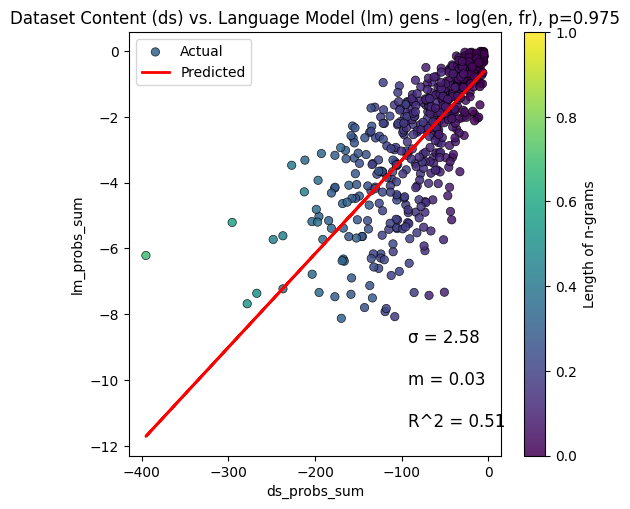

In [ ]:
column_1 = 'ds_probs'
column_2 = 'lm_probs'
df = create_ngram_dataframe(doc_results_new)

# Assuming 'df' is your DataFrame containing the data
examples_pth_common_dir = os.path.dirname(examples_pth_common)
save_pth = os.path.join(examples_pth_common_dir, 'plots')
if not os.path.exists(save_pth):
    os.makedirs(save_pth)
# model, df_test, stats_test = fit_and_evaluate_linear_regression(df, column_1, column_2)
# print(df_test)

model_examples, df_examples_test, stats = fit_and_evaluate_linear_regression(df_examples, 
                                                                             'ds_probs_sum', 
                                                                             'lm_probs_sum',
                                                                             save_pth=save_pth,
                                                                             title=f'Dataset Content (ds) vs. Language Model (lm) gens - {NAME}')

# # randomly permute x axis
# df_random_x = df_examples_test.copy()
# df_random_x['ds_probs_sum'] = np.random.permutation(df_random_x['ds_probs_sum'].values)
# model_random_x, df_random_x_test, stats_random_x = fit_and_evaluate_linear_regression(df_random_x, 
#                                                                                       'ds_probs_sum', 
#                                                                                       'lm_probs_sum',
#                                                                                       save_pth=model_results_pth,
#  

In [ ]:
examples_pth_common_dir

'./results/n-grams/europarl/pile/exp4/n_samples_20000_fkeyFalse_rkeyFalse_fstopFalse_onlyalphaTrue/2/common'

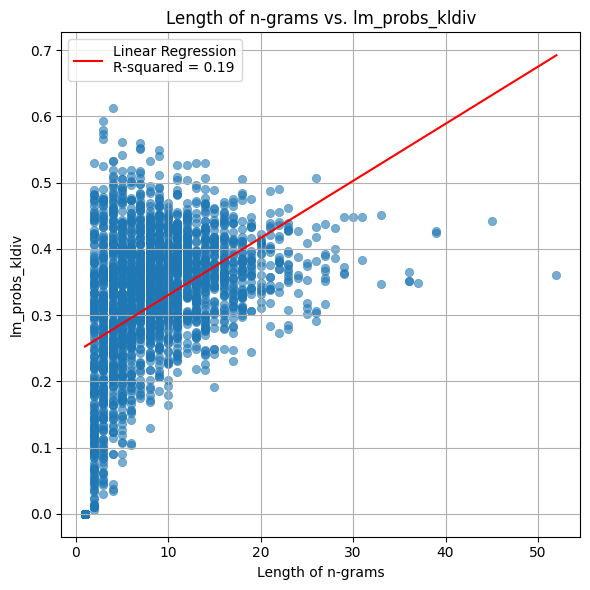

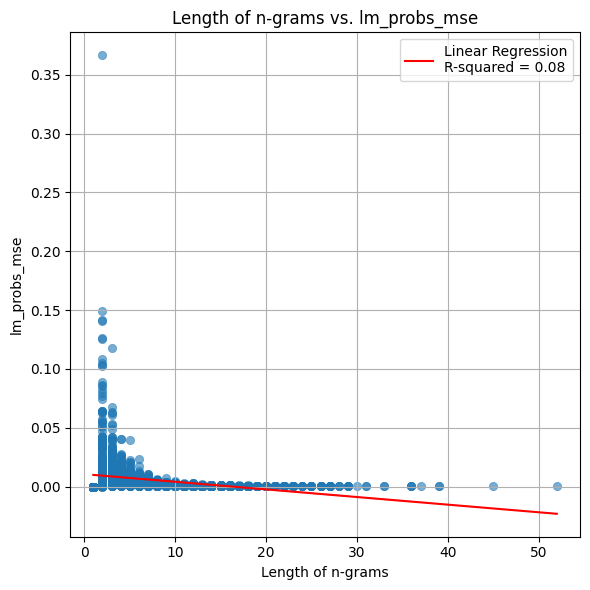

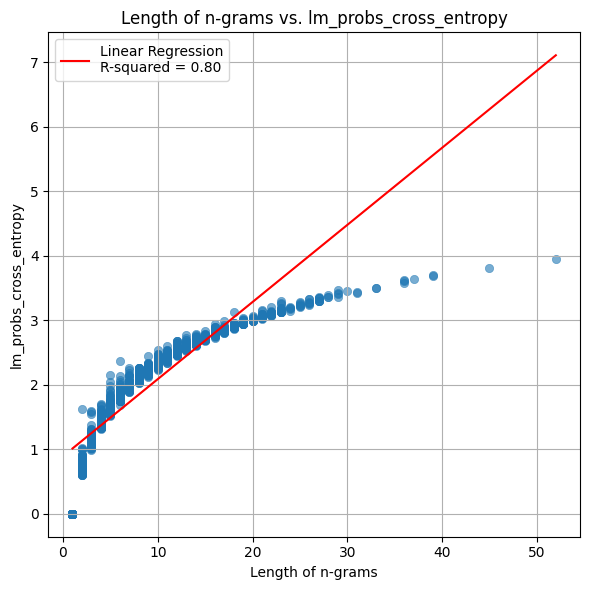

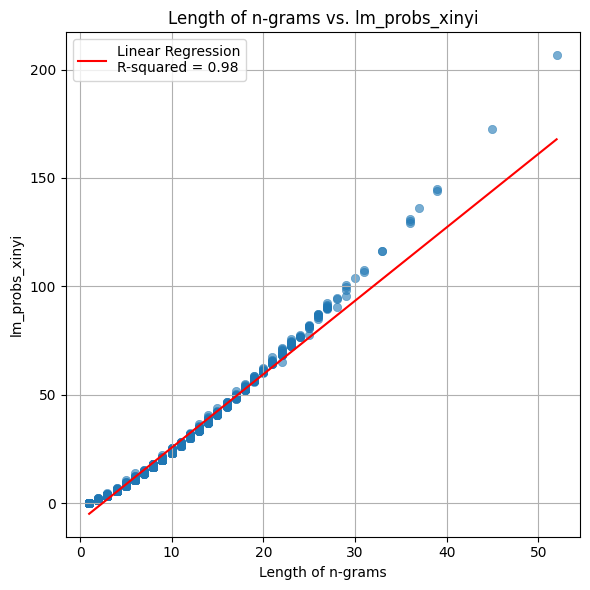

In [ ]:
import seaborn as sns

def plot_len_ngrams_vs_kldiv(df, y_axis='lm_probs_kldiv', save_pth=None):
    # Ensure the necessary columns are in the DataFrame
    if 'len_ngrams' not in df or 'lm_probs_kldiv' not in df:
        raise ValueError("DataFrame must contain 'len_ngrams' and 'lm_probs_kldiv' columns.")

    plt.figure(figsize=(6, 6))
    
    # Fit a linear regression model
    model = LinearRegression()
    X = df[['len_ngrams']]
    y = df[y_axis]
    model.fit(X, y)
    
    # Make predictions
    predictions = model.predict(X)
    
    # Calculate R-squared value
    r_squared = r2_score(y, predictions)
    
    # Plot the data points
    sns.scatterplot(data=df, x='len_ngrams', y=y_axis, alpha=0.6, edgecolor=None)
    
    # Plot the regression line
    sns.lineplot(x=df['len_ngrams'], y=predictions, color='red', label=f'Linear Regression\nR-squared = {r_squared:.2f}')
    
    plt.title(f'Length of n-grams vs. {y_axis}')
    plt.xlabel('Length of n-grams')
    plt.ylabel(f'{y_axis}')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    
    if save_pth is not None:
        plotname = f"len_ngrams_vs_{y_axis}_{NAME}.png"
        plt.savefig(os.path.join(save_pth, plotname))
    
    plt.show()

plot_len_ngrams_vs_kldiv(df_examples, 'lm_probs_kldiv', save_pth)
plot_len_ngrams_vs_kldiv(df_examples, 'lm_probs_mse', save_pth)
plot_len_ngrams_vs_kldiv(df_examples, 'lm_probs_cross_entropy', save_pth)
plot_len_ngrams_vs_kldiv(df_examples, 'lm_probs_xinyi', save_pth)

In [ ]:
# len_ngrams_unique = df_examples['len_ngrams']
# for len_ngram in len_ngrams_unique:
#     df_len_ngram = df_examples[df_examples['len_ngrams'] == len_ngram]
#     model_examples, df_examples_test, stats = fit_and_evaluate_linear_regression(df_len_ngram, 
#                                                                                  'ds_probs_sum', 
#                                                                                  'lm_probs_sum',
#                                                                                  save_pth=model_results_pth,
#                                                                                  title=f'Dataset Content (ds) vs. Language Model (lm) gens - {NAME} - {len_ngram} ngrams')